# What Factors Influence and can Predict Academic Success?
#### A Case Study on two Portugese Schools using Data Science by Peter Shi in Collaboration with Leelee Liang
###### Published on 12/21/2020

## Introduction
Data science is analysis using data. In this tutorial, we will walk through the entire pipeline including data wrangling, exploratory data analysis, hypothesis testing, machine learning, and statements we can make summarizing the insights learned throughout the process. The data we have chosen to analyze is 30 columns of various features potentially impacting grade including gender, age, address, family size, etcetera between Gabriel Pereira and Mousinho da Silveira schools.

Here we list all the libraries and modules we will use throughout the tutorial to import them now for convenience, but we will list them again as we use them for the first time. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Data Wrangling
Our first step, data wrangling, is the acquirement and processing of data so as to analyze it. This can be achieved in a variety of ways including scraping publically available data from the html on websites, surveying your subjects yourself, simulations that generate data, and more, eventually arriving at something like a comma separated values file with data neatly organized, easily readable by a machine. If you are acquiring your data of interest in a different way, you can look into python's beautifulsoup library to read html or sqlite3 for sqlite files.

We will be working on a csv (comma separated values) file, with the pandas library, which includes table-like objects called dataframes. Pandas includes the read_csv() function which can read csv files into a dataframe. We will do this for the math and portugese files, then combine them with pandas' concat() function. 30 features is a lot, so we will select a portion for some operations. Dataframes accept arrays of column names for selection, and we can call head() to see a few entries to make sure we have it right. 

In [411]:
import pandas as pd

# Reading files into a dataframe
mat_data = pd.read_csv("student-mat.csv", header=0, sep=';', engine='python')
por_data = pd.read_csv("student-por.csv", header=0, sep=';', engine='python')
total_data = pd.concat([mat_data, por_data], axis=0)

print(total_data.info())

data = total_data[['school', 'sex', 'age', 'studytime', 'internet', 'absences', 'G3']]

data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

,school,sex,age,studytime,internet,absences,G3
0,GP,F,18,2,no,6,6
1,GP,F,17,2,yes,4,6
2,GP,F,15,2,yes,10,10
3,GP,F,15,3,yes,2,15
4,GP,F,16,2,no,4,10


If your data does not come with well-named columns, you can rename them by setting the columns attribute with an array. Also be sure to check if there are missing values or special characters that you may want to replace with a more processable symbol using dataframe.replace(toReplace, replacement) which can also accept arrays.

In [429]:
cols = data.columns
data.columns = ['one', 'two', 'three', 'four', 'five', 'six', 'seven']
data.head()

,one,two,three,four,five,six,seven
0,GP,F,18,2,no,6,6
1,GP,F,17,2,yes,4,6
2,GP,F,15,2,yes,10,10
3,GP,F,15,3,yes,2,15
4,GP,F,16,2,no,4,10


In [431]:
data.columns = cols
data.head()

,school,sex,age,studytime,internet,absences,G3
0,GP,F,18,2,no,6,6
1,GP,F,17,2,yes,4,6
2,GP,F,15,2,yes,10,10
3,GP,F,15,3,yes,2,15
4,GP,F,16,2,no,4,10


### Exploratory data analysis:
Now that we have our data in a dataframe, let's select some features to examine in relation to final grade 'G3' to get a quick first look at what their relationship looks like. To do this, we will import matplotlib's pyplot module to output some graphs for visualization. We will iterate over the columns returned by dataframe's iteritems() function, group the grades by each column's classification, and graph the mean grade of those in each classifier. Various lines to customize the graph are included. We do this again for the 'absences' column to show how a scatter plot can look as it seems to be a better way to show more continuous data.

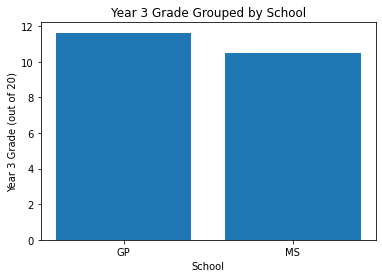

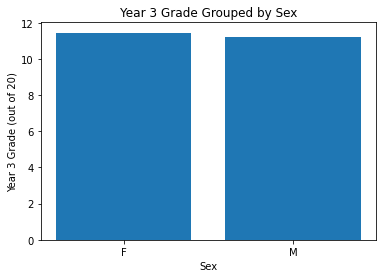

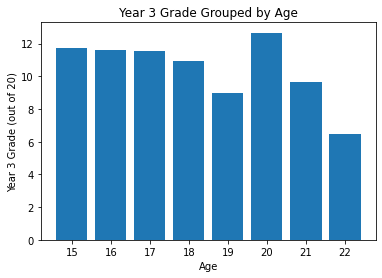

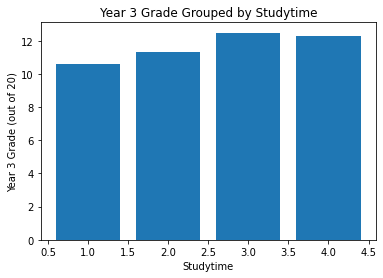

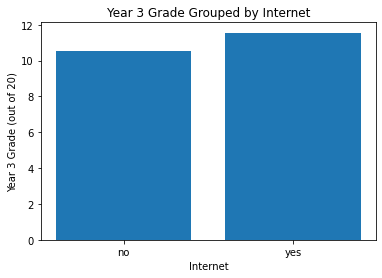

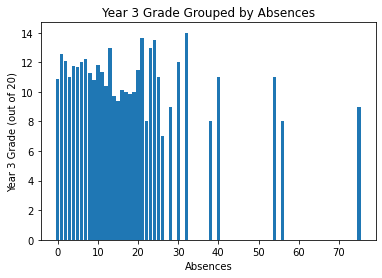

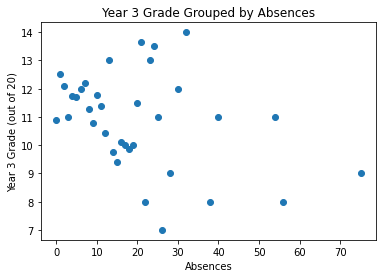

In [585]:
import matplotlib.pyplot as plt

for (col_name, col_data) in data.drop(columns=['G3']).iteritems():
    col_data = data[[col_name, 'G3']].groupby([col_name], as_index = False).mean()
    fig, ax = plt.subplots()
    ax.set_title("Year 3 Grade Grouped by " + col_name.capitalize())
    plt.bar(col_data[col_name], col_data['G3'])
    plt.xlabel(col_name.capitalize())
    plt.ylabel('Year 3 Grade (out of 20)')
    plt.show()
    
absence_data = data[['absences', 'G3']].groupby(['absences'], as_index = False).mean()
fig, ax = plt.subplots()
ax.set_title('Year 3 Grade Grouped by Absences')
plt.scatter(absence_data['absences'], absence_data['G3'])
plt.xlabel('Absences')
plt.ylabel('Year 3 Grade (out of 20)')
plt.show()

We can notice a couple of things from this exploratory analysis. There is not a significant difference in grade between schools, genders, or internet access. Gabriel Pereira is higher than Mousinho da Silveira by about 1 grade value. Females are higher than males by about ~0.2. Internet access is also a difference of about 1. Grade seems to slowly drop from age 15 to 19, spike at 20, and rapidly drop to the prior low from 21 to 22 within the range of ~[9, 12] in grade. Study time is weighted somewhat exponentially <2, 2-5, 5-8, 10 hours so studying 3-6 more hours per week seems to raise grade by a bit more than 1 on average. 

Absences is spread out over many counts. We could aggregate this and look at ranges, but another option is a least squares line on top of the scatter plot which helps show its linearity a bit better as well as offers an expected grade from the student's number of absences. To do this, we will use the numpy library's polyfit function which returns the coefficient and y-intercept of a linear function. Then we just need to plot this function with plt as well. 

Grade = -0.03671 Absences + 11.64143


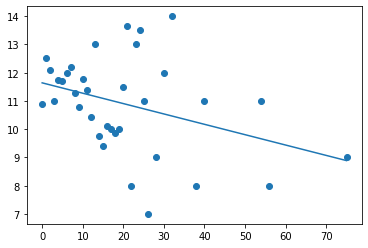

In [588]:
import numpy as np

m, b = np.polyfit(absence_data['absences'], absence_data['G3'], 1)
print("Grade = %.5f Absences + %.5f" %(m,b))
plt.scatter(absence_data['absences'], absence_data['G3'])
plt.plot(absence_data['absences'], m*x + b)
plt.show()

Grade seems to decrease by .037 for every one absence on average, however the data is rather sparse towards more than 20-30  absences so it is more of an extrapolation. Those data points are not a mean, but single cases (shown below). It is because of this that there are higher grades from 0-30, but the spread is just getting larger as there are not many cases. Notice the label range gets smaller as well, if we look at the raw data, there will be many high scorers at 0 absences when there is not that many other students at 0 absences weighing them towards a lower average.

We'll plot every student as a point to show this. 

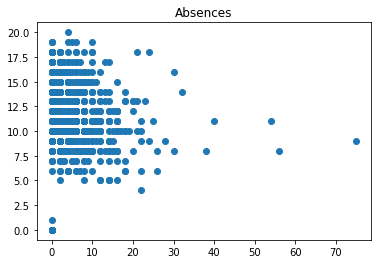

In [367]:
fig, ax = plt.subplots()
ax.set_title('Absences')
plt.scatter(data['absences'], data['G3'])
plt.show()

This shows the distribution of absences vs grades pretty well, but we're not making use of colors to show more. Let's use list comprehensions to generate an array suitable for directing scatter plot point colors to visualize gender distribution in relation with absences and grades. List comprehensions are an elegant way to generate a list using iterables. 

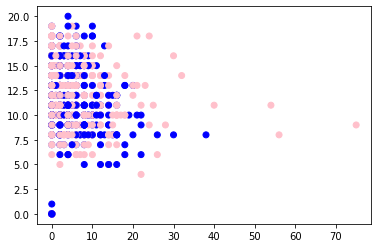

In [374]:
gender_colors = ['blue' if student == 'M' else 'pink' for student in data['sex']]

plt.scatter(data['absences'], data['G3'], color=gender_colors)
plt.show()

Now we can see which points are which gender. There is not much to say about relatively low absences (0 to 20), but some outliers we notice are the 3 girls at unusually large absences (50 to ~75) and the two boys with unusually low grades (~1.25 - 0) at zero absences. 

Now let's try the same thing with a feature that is more of a gradient, age. We cannot color key as easily when there's a large range of values, but we can use use pyplot's scatter function's cmap (color map) parameter to assign the data to a color map. In this case, we use a red, yellow, green gradient where youngest is red and oldest is green. From dataframe functions min() and max(), we can find out the range, 15 to 22, and from boolean operations we can find the data of the highest red dot.

More color map options can be found in the documentation
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

   school sex  age  studytime internet  absences  G3
47     GP   M   16          4      yes         4  20
15
22


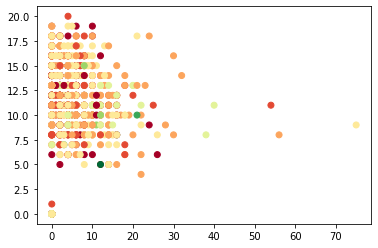

In [401]:
plt.scatter(data['absences'], data['G3'], c=data['age'], cmap="RdYlGn")

print(data[data['G3'] == data['G3'].max()])
print(data['age'].min())
print(data['age'].max())

We can normalize absences and grades, which just means performing two operations: subtracting the mean and then dividing by the standard deviation. What this does is first centers the data around 0 (mean = 0), then measures deviation in terms of standard deviations (standard deviation = 1). This standardizes the data such that it is much more comparable with other normalized data. Python's dataframe has methods that takes care of finding the mean and standard deviation. On graphing the transformed data, we find its shape has not changed, but we can now see how absences influences grade in terms of standard deviations which is much more relative.  

In [547]:
import statsmodels.stats.weightstats as sm

abs_mean = data['absences'].mean()
abs_std = data['absences'].std()
norm_abs = (data['absences'] - abs_mean) / abs_std

grd_mean = data['G3'].mean()
grd_std = data['G3'].std()
norm_grd = (data['G3'] - grd_mean) / grd_std

tstat, pvalue = sm.ztest(norm_abs, norm_grd)

print(norm_abs.head(), norm_grd.head())

0    0.252034
1   -0.070027
2    0.896154
3   -0.392087
4   -0.070027
Name: absences, dtype: float64 0   -1.382209
1   -1.382209
2   -0.347225
3    0.946504
4   -0.347225
Name: G3, dtype: float64


If we were to apply a regression line to the normalized data, we would find the y intercept is 0 (approximated to near 0), and the coefficient to be similar to before, but now in terms of standard deviations (grade change in standard deviations with each standard deviation increase in absences) with standard deviation being a measure of the spread of the data. 


Grade =  -0.0456705769883734 Absences +  -1.580584840074503e-16


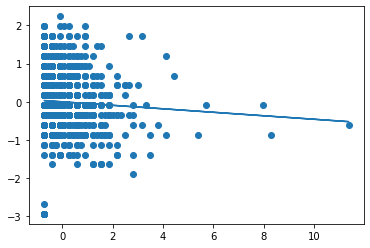

In [470]:
m, b = np.polyfit(norm_abs, norm_grd, 1)
print("\nGrade = ", m, "Absences + ", b)

plt.scatter(norm_abs, norm_grd)
plt.plot(norm_abs, m*norm_abs + b)
plt.show()

Another interesting thing we can ask is does having internet access correlate to decreased study time? We group grades by internet access to find out. 

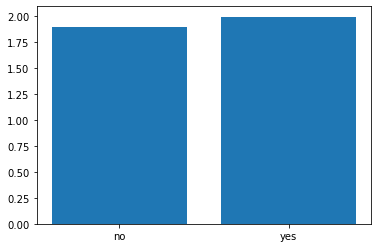

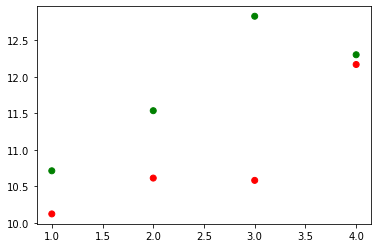

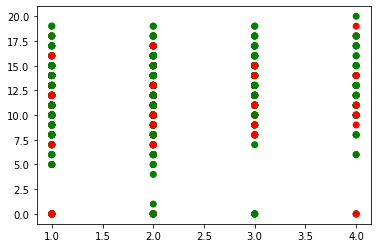

In [607]:
cols = ['internet', 'studytime']
net_groupby = data[cols].groupby('internet', as_index = False)
study_net = net_groupby.mean()

plt.bar(study_net['internet'], study_net['studytime'])
plt.show()

cols = ['internet', 'studytime', 'G3']
study_net_grade_groupby = data[cols].groupby(['internet', 'studytime'], as_index = False)
study_net_grade = study_net_grade_groupby.mean()

net_colors = ['green' if net_access == 'yes' else 'red' for net_access in study_net_grade['internet']]
plt.scatter(study_net_grade['studytime'], study_net_grade['G3'], c = net_colors)
plt.show()

net_colors = ['green'if net_access == 'yes' else 'red' for net_access in total_data['internet']]
plt.scatter(total_data['studytime'], total_data['G3'], c = net_colors)
plt.show()

Suprising to see that in this case, students at the two schools do not study less when they have access to internet on average. Possibly studying more due to having access to more resources? 

Looking at the grades by study time and internet access shows lower grades without internet access. 

### Machine Learning
Now that we have some idea of what our data looks like in relation to itself, let's get back to the question of what predicts grade. To do this, we will perform machine learning which is using statistics to find patterns so as to predict things we want to know. The libraries/models we will use only take numerical data, so we will have to convert our categorical data like yes or no questions, or parent's occupation type.

An elegant way to do this is iterating over dataframe's select_dtypes() function to pick out the non-int columns, get a list of its unique values using series.drop_duplicates(), with series being the name of a column in a dataframe, and replace each category with a number.

Then we split the data into our features (independent variables) and results (dependent variable). We convert grades into a boolean representing above average grade to make this a classification problem as it's difficult to predict on a continuous range accurately, at least with modest sample sizes. Next is splitting both sets into train/test splits, we will use section to train our model, and the rest for testing. It is important that your model does not get to see any of the test data, and that the selection is unbiased so that the model is not effectively peeking at the answer and is truly predicting it. For split parameters, we pick a test_size of 33% and an arbitrary random state which just ensures the same split for the same number to reproduce results.

The parameter we include for LogisticRegression() is an arbitrarily large max iterations to ensure convergence. 

In [598]:
df = total_data.drop(columns=['G1', 'G2'])

df = df.replace(['yes', 'no', 'GT3', 'LE3'], [1, 0, 1, 0])

# Replace categories with numbers
for (col_name, col_data) in df.select_dtypes(include=[object]).iteritems():
    categories = col_data.drop_duplicates().to_list()
    df = df.replace(categories, range(len(categories)))
    print(col_name)

df_x = df.drop(columns=['G3'])
df_y = total_data['G3']
df_y = df_y > df_y.mean()

school
sex
address
Pstatus
Mjob
Fjob
reason
guardian


In [601]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Random state controls the randomness so as to be reproducible if you provide an int
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

reg = LogisticRegression(max_iter=10000).fit(x_train, y_train)

Now that we have fitted a model, we can look at the coefficients for the terms by themselves as independent variables to roughly gauge which ones are the most influential in predicting whether a student will earn a grade above the mean according to python's logistic regression implementation. To gauge the accuracy of our model, we will make use of sklearn's metrics module's accuracy_score function to compare our predicted y values and the actual ones. 

Feature: 1,	Score: -0.55024
Feature: 2,	Score: -0.30797
Feature: 3,	Score: 0.00552
Feature: 4,	Score: -0.24322
Feature: 5,	Score: -0.13208
Feature: 6,	Score: 0.19178
Feature: 7,	Score: 0.15748
Feature: 8,	Score: 0.10602
Feature: 9,	Score: 0.07789
Feature: 10,	Score: 0.12641
Feature: 11,	Score: 0.10619
Feature: 12,	Score: 0.25327
Feature: 13,	Score: -0.08733
Feature: 14,	Score: 0.18688
Feature: 15,	Score: -1.38275
Feature: 16,	Score: -1.30839
Feature: 17,	Score: -0.29097
Feature: 18,	Score: -0.67425
Feature: 19,	Score: 0.22924
Feature: 20,	Score: 0.12414
Feature: 21,	Score: 1.65828
Feature: 22,	Score: 0.07701
Feature: 23,	Score: 0.07544
Feature: 24,	Score: 0.03352
Feature: 25,	Score: -0.04871
Feature: 26,	Score: -0.10521
Feature: 27,	Score: -0.02191
Feature: 28,	Score: -0.05850
Feature: 29,	Score: -0.08387
Feature: 30,	Score: -0.05984
Accuracy: 0.7043478260869566


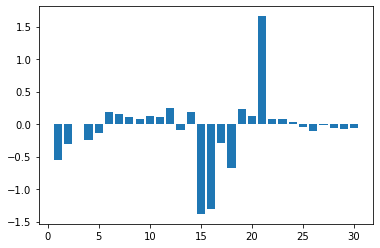

In [600]:
importance = reg.coef_[0]

# summarize feature importance as independents
for i,v in enumerate(importance):
    print('Feature: %0d,\tScore: %.5f' % (i+1,v))

plt.bar(range(1, 31, 1), importance)

y_pred = reg.predict(x_test)

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

plt.show()

Our accuracy is 70% in predicting above average final grades which is not bad.

We see features 1, 15, 16 as heavily predicting lower grades and feature 21 in predicting higher grades as outliers as the coefficients of the terms are negative or positive and large in magnitude. These are school, past class failures, extra educational support, and whether they are planning on taking higher education respectively.

Let's try fitting the same model, but with only the features the logistic regression weighted the most. We can even try a different random state to test whether choice of train/test split changes anything. We select the features using iloc (index locate), ':' as a fill in for rows, and the column indices of the features. Everything else is the same process as before.  

In [602]:
df_x = df.iloc[:, [0, 14, 15, 20]]
df_y = total_data['G3'] 
df_y = (df_y > df_y.mean())

# Random state controls the randomness so as to be reproducible if you provide an int
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=13)

reg = LogisticRegression(max_iter=10000, class_weight = 'balanced')
reg = reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.672463768115942


Only a 2% accuracy loss from whittling 30 features down to the 4 most heavily weighted features! An ~86.7% decrease in features. This is handy for requiring less information to make a good guess, because 30 features is a lot when hand inputting information for each subject.

Feel free to fill in your own features (school, past class failures, extra educational support, and plans on higher education) to see if the model thinks you would have an above average final grade if you were one of the students. The first is not relevant unless you go to either school so you can try either. Remember we substitued no/Gabriel Pereira for 0 and yes/Mousinho da Silveira for 1.

In [570]:
print(reg.predict(np.array([0, 0, 0, 1]).reshape(-1, 4)))
print(reg.predict(np.array([1, 0, 0, 1]).reshape(-1, 4)))

[ True]
[False]


The model predicts I would have above average grades if I was a Gabriel Pereira student and that I would not if I attended Mousinho da Silveira.

The site we downloaded the data from mentioned that 1st and 2nd year grades (G1, G2) were the best predictors for 3rd year grades (G3), but that was not very useful as the goal is to find out what predicts grades in the first place. We can test this out by doing the same with year 1 and 2 grades as features.

In [603]:
df_x = total_data[['G1', 'G2']]
df_y = total_data['G3']
df_y = df_y > df_y.mean()

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

reg2 = LogisticRegression(max_iter=10000, class_weight = 'balanced')
reg2 = reg2.fit(x_train, y_train)

Feature: 1, Score: 0.33940
Feature: 2, Score: 2.17614
Accuracy: 0.936231884057971


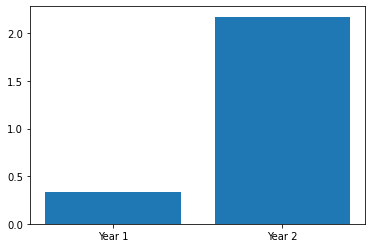

In [475]:
importance = reg2.coef_[0]

# summarize feature importance as independents
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i+1,v))

plt.bar(['Year 1', 'Year 2'], importance)

y_pred = reg.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

plt.show()

Interestingly, year 2 is a much better predictor of year 3 grades, weighted more than 4 times as much! We can hypothesize this is because students may be unused to the system at the school and their first grades are not representative of what they can achieve with experience whereas grades after a year of getting used to the school is a much better indicator of their future grades. Unsurprisingly, prior year grades are much more accurate than various loosely related features in predicting if final grade will be above average, around a 33-36% accuracy increase with only 2 features compared to 30 or 4. 

Besides logistic regression, 6 other supervised machine learning classification algorithms we can use include the below.

* Linear Discriminant Analysis (LDA) (only classification)
* classification (or regression) trees,
* random forests
* linear SVM,
* non-linear SVM
* k-NN classification (or regression)

Which algorithm is best can vary, especially depending on your data, so you can try them out and test which one is best suited for predicting based on your dataset. We will pick two for demonstration. For testing, we are going to use a 10-fold split, which means that we are going to split the data into training and testing sets 10 times such that all of the data is the test section at one point. For each split, we will record the accuracy score for logistic regression, linear discriminant anlysis, and decision tree classification. Let's begin with setup and preparing variables.

In [604]:
from sklearn.model_selection import KFold

# Recalibrate index and drop the old indices
df_x = df_x.reset_index(drop = True)
X = np.array(df_x).reshape(-1, 4)

y = df['G3']
y = y > y.mean()
y = y.reset_index(drop = True)

kf = KFold(n_splits=10)
kf.get_n_splits(X)

LR_scores = np.zeros(10)
LDA_scores = np.zeros(10)
DTC_scores = np.zeros(10)

Now that we have selected the indices for the splits, we will iterate over them, fit the training data, and calculate scores. 

In [606]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

score_i = 0;

# 10-fold splits
for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    # Fitting
    LDA = LinearDiscriminantAnalysis().fit(X_train, y_train)
    DTC = tree.DecisionTreeClassifier().fit(X_train, y_train)
    LR = LogisticRegression(max_iter=10000, class_weight = 'balanced').fit(X_train, y_train)

    # Calculating, storing, and outputting scores
    LDA_score = LDA.score(X_test, y_test)
    DTC_score = DTC.score(X_test, y_test)
    LR_score = LR.score(X_test, y_test)

    LR_scores[score_i] = LR_score
    LDA_scores[score_i] = LDA_score
    DTC_scores[score_i] = DTC_score
    score_i += 1

    print("%.5f : %.5f : %.5f" % (LDA_score, DTC_score, LR_score))

0.52830 : 0.50943 : 0.58491
0.50943 : 0.56604 : 0.50943
0.59615 : 0.42308 : 0.51923
0.53846 : 0.44231 : 0.53846
0.53846 : 0.53846 : 0.50000
0.53846 : 0.51923 : 0.48077
0.57692 : 0.42308 : 0.59615
0.48077 : 0.44231 : 0.50000
0.36538 : 0.40385 : 0.46154
0.46154 : 0.51923 : 0.44231


At first glance, linear discriminant analysis and decision tree classifying seem to be doing better than logistic regression by a percent in the single digits.

Now let's average them for a clearer overview as well as perform a 2-sample t-test for difference in true mean for LDA and DTC against LR. This is used with small samples, which 10 fits pretty well, (n < 30 can still be considered small). The stats module in scipy has a handy function for this. Our null hypothesis is the means are the same and the alternate is that the means are not. We can choose a level of significance to judge the p-value against, say 5%. If the p-value is less than the level of significance, 0.05, then we reject the null hypothesis and accept the alternate that our means are different as the chances of getting our sample given the distribution's true means are equal is less than 5% (pretty unlikely). 

In [576]:
from scipy import stats

print("\nScore complement mean of LDA: %.5f" % ((10 - LDA_scores.sum())/10))
print("Score complement mean of DTC: %.5f" % ((10 - DTC_scores.sum())/10))
print("Score complement mean of LR: %.5f" % ((10 - LR_scores.sum())/10))
print("LDA vs LR t-test pvalue: %.5f" % (stats.ttest_rel(LDA_scores, LR_scores).pvalue))
print("DTC vs LR t-test pvalue: %.5f" % (stats.ttest_rel(DTC_scores, LR_scores).pvalue))


Score complement mean of LDA: 0.31787
Score complement mean of DTC: 0.31787
Score complement mean of LR: 0.34261
LDA vs LR t-test pvalue: 0.23704
DTC vs LR t-test pvalue: 0.23704


Now with the summarized data, we see that linear discriminant analysis and decision tree classifying are actually more accurate than logistic regression (less points lost). However, our t-test of logistic regression against both the other methods returned a p-value of ~0.23 which is > 0.05, our level of significance, so we accept the null hypothesis that the means of the samples are the same. So the other methods are not significantly more accurate than logisitic regression.

#### Further Reading
###### Calculating Feature Importance with Python
https://machinelearningmastery.com/calculate-feature-importance-with-python/>
###### How to increase Model Accuracy of Logistic Regression in Python
https://stackoverflow.com/questions/38077190/how-to-increase-the-model-accuracy-of-logistic-regression-in-scikit-python

#### Refs

##### Data (Try it out yourself or follow along)
https://archive.ics.uci.edu/ml/datasets/Student+Performance?fbclid=IwAR3LwfRhSdAJeCyq6TPozjZP7ex7a5FdKQae1mNi2ZAcxO_-WBHkCOZpOjA

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

#### Kaggle, a great source of databases/data science hub to pick out what something you personally are interested in analyzing 
https://www.kaggle.com/
